In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

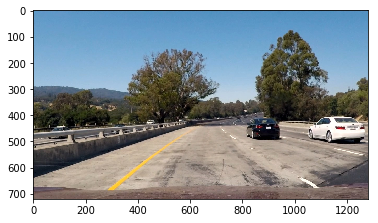

In [2]:
img = mpimg.imread('../test_images/test1.jpg')
plt.imshow(img)
plt.show()

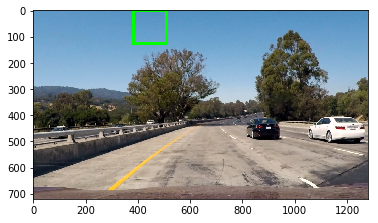

In [3]:
top_left = (384,0)
bottom_right = (510,128)
green = (0,255,0)
width = 10
t=cv2.rectangle(img,top_left,bottom_right,green,width)
plt.imshow(t)
plt.show()

In [4]:
def draw_boxes(img, bboxes,color=(0,0,255),thick = 6):
    draw_img = np.copy(img)
    print(draw_img.shape)
    for box in bboxes:
        draw_img = cv2.rectangle(draw_img,box[0],box[1],color,thick)
    print(draw_img[0])
    return draw_img

(720, 1280, 3)
[[254 233 216]
 [245 238 232]
 [196 205 212]
 ..., 
 [ 16  35  52]
 [ 20  37  53]
 [ 32  48  63]]


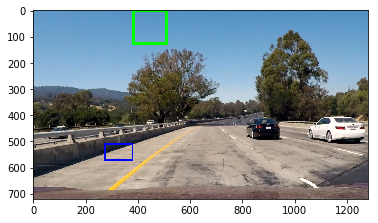

In [5]:
bboxes=[((275,572),(380,510))]
t1 = draw_boxes(img,bboxes)
plt.imshow(t1)
plt.show()

## Exercise 2: Histograms of Color ###

In [6]:
#Read the image
image = mpimg.imread('cutout1.jpg')

In [7]:
#Take histogram in R,G,B with 32 bins
rhist = np.histogram(image[:,:,0],bins=32,range=(0,256))
ghist = np.histogram(image[:,:,1],bins=32,range=(0,256))
bhist = np.histogram(image[:,:,2],bins=32,range=(0,256))

print("Number of counts:",rhist[0].shape)
print("Number of bins:",rhist[1].shape)
#Notice that the numbers is number of counts +1 as it contains bin edges which start with zero


Number of counts: (32,)
Number of bins: (33,)


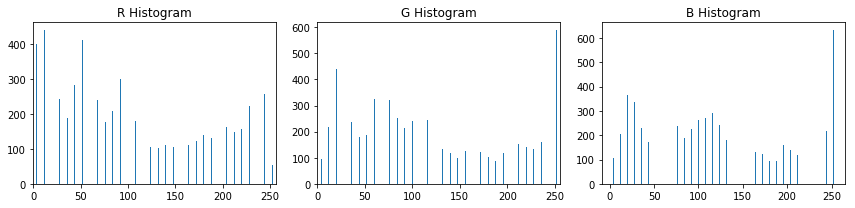

[400 441 302 244 189 283 412 433 239 177 209 302 276 179 129 106 104 111
 106  96 111 123 139 130 167 164 149 156 222 268 258  53]
[ 95 219 441 331 235 179 188 324 340 321 252 215 242 296 244 198 133 117
  98 127  88 120 104  88 117 172 152 142 133 159 219 589]
[106 206 367 337 230 174 235 328 316 238 189 227 261 271 291 244 179 148
 134 112 129 123  94  93 160 138 117 110 121 148 219 633]
[   4.   12.   20.   28.   36.   44.   52.   60.   68.   76.   84.   92.
  100.  108.  116.  124.  132.  140.  148.  156.  164.  172.  180.  188.
  196.  204.  212.  220.  228.  236.  244.  252.]


In [8]:
#Visualize color histograms

#Generate bin cneters
bin_edges = rhist[1]
bin_centers = (bin_edges[0:len(bin_edges)-1]+bin_edges[1:])/2 #Take mid point of current bin and next bin
#print(bin_centers)

#Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers,rhist[0])
plt.xlim(0,256)
plt.title('R Histogram')

plt.subplot(132)
plt.bar(bin_centers,ghist[0])
plt.xlim(0,256)
plt.title('G Histogram')

plt.subplot(133)
plt.bar(bin_centers,bhist[0])
plt.xlim(0,256)
plt.title('B Histogram')
fig.tight_layout()
plt.autoscale(True,axis='both')

plt.show()
print(rhist[0])
print(ghist[0])
print(bhist[0])
print(bin_centers)

## Exercise 3: Explore Color Spaces ##


In [9]:
from mpl_toolkits.mplot3d import Axes3D

def plot3d(pixels, colors_rgb, axis_labels=list("RGB"),
           axis_limits=[(0,255),(0,255),(0,255)]):
    
    #Create figure and 3D axes
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    
    #set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])
    
    #Set axis labels and sizes
    ax.tick_params(axis='both',which='major',labelsize=14,pad=8)
    ax.set_xlabel(axis_labels[0],fontsize=16,labelpad=16)
    ax.set_xlabel(axis_labels[1],fontsize=16,labelpad=16)
    ax.set_xlabel(axis_labels[2],fontsize=16,labelpad=16)
    
    #Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:,:,0].ravel(),
        pixels[:,:,1].ravel(),
        pixels[:,:,2].ravel(),
        c = colors_rgb.reshape((-1,3)),
        edgecolors='none')
    
    return ax
    
    

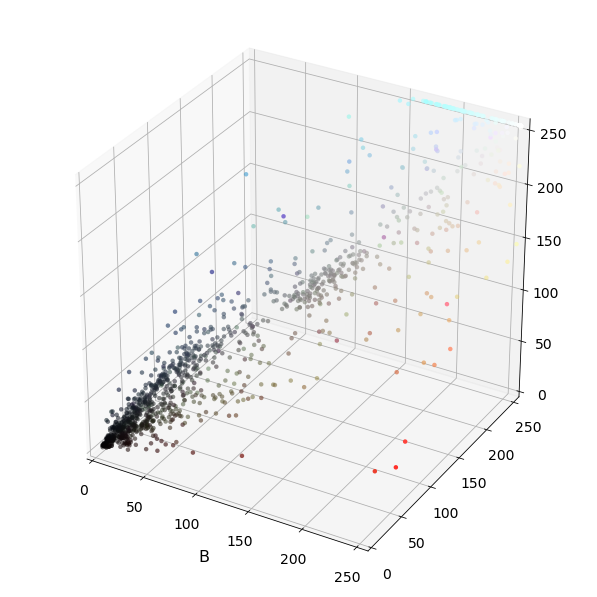

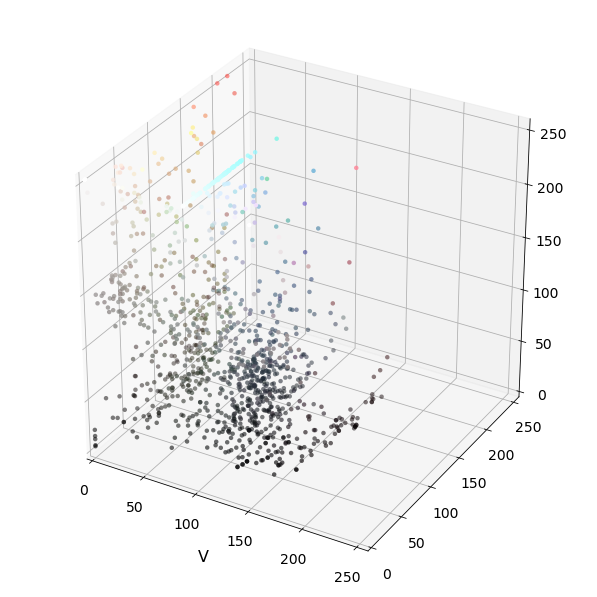

In [10]:
#read color image
img = cv2.imread("000275.png")

#Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0],img.shape[1],64)/64 #at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1]/scale), np.int(img.shape[0]/scale)), interpolation= cv2.INTER_NEAREST)

#convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB/255

#Plot ans show
plot3d(img_small_RGB,img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

### Scikit HOG

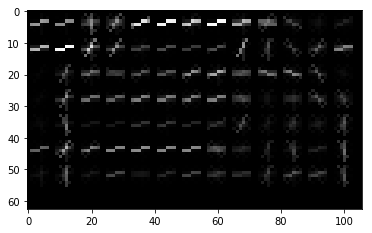

In [16]:
from skimage.feature import hog
num_orient_bins = 9
pix_per_cell = 8
cell_per_block = 2

image = mpimg.imread('cutout1.jpg')
grey_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
features, hog_image = hog(grey_img, orientations = num_orient_bins, pixels_per_cell=(pix_per_cell,pix_per_cell),
                         cells_per_block=(cell_per_block,cell_per_block), visualise=True, feature_vector=False)

plt.imshow(hog_image,cmap='gray')
plt.show()

In [22]:
def get_hog_features(img,num_orient_bins=9,pix_per_cell=8, cell_per_block=2,vis=False,feature_vec=True):
    if vis == True:
        features,hog_image = hog(img,orientations = num_orient_bins, pixels_per_cell = (pix_per_cell,pix_per_cell),
                                cells_per_block=(cell_per_block,cell_per_block),visualise=True,
                                 feature_vector=feature_vec)
        return features,hog_image
    else:
        features = hog(img,orientations= num_orient_bins,pixels_per_cell=(pix_per_cell,pix_per_cell),
                      cells_per_block=(cell_per_block,cell_per_block),visualise=False,feature_vector=feature_vec)
        return features

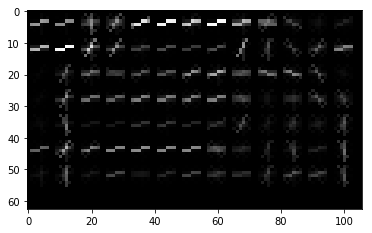

In [24]:
hog_image1= get_hog_features(grey_img,num_orient_bins,pix_per_cell,cell_per_block,vis=False,feature_vec=True)
plt.imshow(hog_image,cmap='gray')
plt.show()

In [25]:
# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features  
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features


In [ ]:
def extract_features(imgs, cspace='RGB', spatial_size=(32, 32),
                        hist_bins=32, hist_range=(0, 256)):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
        # Read in each one by one
        # apply color conversion if other than 'RGB'
        # Apply bin_spatial() to get spatial color features
        # Apply color_hist() to get color histogram features
        # Append the new feature vector to the features list
        
    # Return list of feature vectors
    return features

In [ ]:
import glob
images = glob.glob()

### Sliding Window

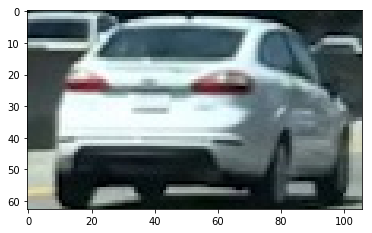

In [122]:
plt.imshow(image)
plt.show()

In [123]:
def draw_boxes(img,bboxes,color=(0,0,255),thick=6):
    imcopy = np.copy(img)
    for box in bboxes:
        cv2.rectangle(imcopy,box[0],box[1],color,thick)
    return imcopy

In [124]:
def slide_window(img,x_start_stop=[None,None],y_start_stop=[None,None],
                xy_window=(64,64),xy_overlap=(0.5,0.5)):
    # print(img.shape)
    if x_start_stop[0] == None: #if  X start pos is None
        x_start_stop[0] = 0
    if y_start_stop[0] == None: # if Y start pos is None
        y_start_stop[0] = 0
    if x_start_stop[1] == None:#if X end pos is None
        x_start_stop[1] = img.shape[1]
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
        
    #Compute the span of the region to be searched
    x_span  = (x_start_stop[1] - x_start_stop[0])
    y_span = (y_start_stop[1] - y_start_stop[0])
    #print(x_span)
    #print(y_span)
    
    #Compute the number of pixels per step in x and y
    x_overlap_pix = xy_window[0]*(1- xy_overlap[0])
    y_overlap_pix = xy_window[1]*(1- xy_overlap[1])
    
    #Compute number of windows along x and y to iterate over image
    nwindows_x = np.int(np.ceil(((x_span - x_overlap_pix)/(xy_window[0]-x_overlap_pix))))
    nwindows_y = np.int(np.ceil(((y_span - y_overlap_pix)/(xy_window[1]-y_overlap_pix))))
    
    #print(x_overlap_pix)
    #print(y_overlap_pix)
    
    #print(nwindows_x)
    #print(nwindows_y)
    xstep = np.int(xy_window[0] *(1-xy_overlap[0]))
    ystep = np.int(xy_window[1] *(1-xy_overlap[1]))
    bboxes=[]
    for i in range(0,nwindows_y):
        wstart_y = y_start_stop[0] + i*ystep
        wend_y   = wstart_y + xy_window[1]
        for j in range(0,nwindows_x):
            #Define boundaries of box
            wstart_x = x_start_stop[0] + j*xstep
            wend_x   = wstart_x + xy_window[0]           
            #Extract image
            #wimg = img[wstart_x:wend_x][wstart_y:wend:y]
            bbox = ((wstart_x,wstart_y),(wend_x,wend_y))
            bboxes.append(bbox)
            print(bbox)
    
    return bboxes
            

In [ ]:
x=(-0,0)
print(x.shape)

In [127]:
bboxes = slide_window(img,x_start_stop=[None,None],y_start_stop=[None,None],xy_window=(64,64),xy_overlap=(0.5,0.5))

((0, 0), (64, 64))
((32, 0), (96, 64))
((64, 0), (128, 64))
((96, 0), (160, 64))
((128, 0), (192, 64))
((160, 0), (224, 64))
((192, 0), (256, 64))
((224, 0), (288, 64))
((256, 0), (320, 64))
((288, 0), (352, 64))
((320, 0), (384, 64))
((352, 0), (416, 64))
((384, 0), (448, 64))
((416, 0), (480, 64))
((448, 0), (512, 64))
((480, 0), (544, 64))
((512, 0), (576, 64))
((544, 0), (608, 64))
((576, 0), (640, 64))
((608, 0), (672, 64))
((640, 0), (704, 64))
((672, 0), (736, 64))
((704, 0), (768, 64))
((736, 0), (800, 64))
((768, 0), (832, 64))
((800, 0), (864, 64))
((832, 0), (896, 64))
((864, 0), (928, 64))
((896, 0), (960, 64))
((928, 0), (992, 64))
((960, 0), (1024, 64))
((992, 0), (1056, 64))
((1024, 0), (1088, 64))
((1056, 0), (1120, 64))
((1088, 0), (1152, 64))
((1120, 0), (1184, 64))
((1152, 0), (1216, 64))
((1184, 0), (1248, 64))
((0, 32), (64, 96))
((32, 32), (96, 96))
((64, 32), (128, 96))
((96, 32), (160, 96))
((128, 32), (192, 96))
((160, 32), (224, 96))
((192, 32), (256, 96))
((2

In [129]:
img_boxes = draw_boxes(image,bboxes)

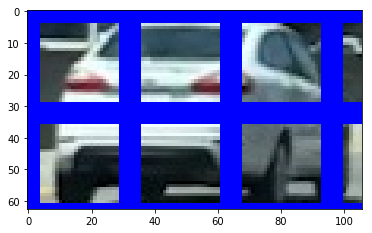

In [130]:
plt.imshow(img_boxes)
plt.show()

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
from lesson_functions import *

dist_pickle = pickle.load( open("svc_pickle.p", "rb" ) )
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]

img = mpimg.imread('test_image.jpg')

# Define a single function that can extract features using hog sub-sampling and make predictions
def find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins):
    
    draw_img = np.copy(img)
    img = img.astype(np.float32)/255
    
    img_tosearch = img[ystart:ystop,:,:]
    ctrans_tosearch = convert_color(img_tosearch, conv='RGB2YCrCb')
    if scale != 1:
        imshape = ctrans_tosearch.shape
        ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]
    ch2 = ctrans_tosearch[:,:,1]
    ch3 = ctrans_tosearch[:,:,2]

    # Define blocks and steps as above
    nxblocks = (ch1.shape[1] // pix_per_cell)-1
    nyblocks = (ch1.shape[0] // pix_per_cell)-1 
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 2  # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog1 = get_hog_features(ch1, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog2 = get_hog_features(ch2, orient, pix_per_cell, cell_per_block, feature_vec=False)
    hog3 = get_hog_features(ch3, orient, pix_per_cell, cell_per_block, feature_vec=False)
    
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step
            xpos = xb*cells_per_step
            # Extract HOG for this patch
            hog_feat1 = hog1[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat2 = hog2[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_feat3 = hog3[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
            hog_features = np.hstack((hog_feat1, hog_feat2, hog_feat3))

            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell

            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = bin_spatial(subimg, size=spatial_size)
            hist_features = color_hist(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            #test_features = X_scaler.transform(np.hstack((shape_feat, hist_feat)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                cv2.rectangle(draw_img,(xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart),(0,0,255),6) 
                
    return draw_img
    
ystart = 400
ystop = 656
scale = 1.5
    
out_img = find_cars(img, ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.imshow(out_img)